In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# sqlalchemy SQL tools and object relational mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [2]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Reflect an existing database into a new model
Base = automap_base()

In [4]:
# Reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# View classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station     = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Perform a query to retrieve the june weather data for all years
june_all_years_tobs_results = []
june_all_years_tobs_results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 6).all()
june_all_years_tobs_df = pd.DataFrame(june_all_years_tobs_results, columns=['date','tobs'])

In [9]:
# Get statistics for june weather data all years
june_all_years_tobs_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


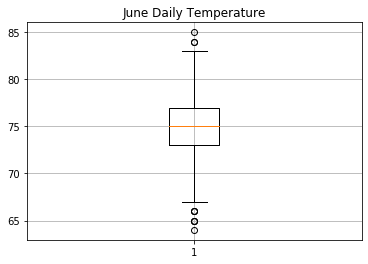

In [29]:
# Generate boxplot for June weather data all years
fig1, ax = plt.subplots()
ax.set_title('June Daily Temperature')
ax.boxplot(june_all_years_tobs_df["tobs"])
ax.grid()
plt.savefig("june_daily_temp_all_years_boxplot.png")

In [11]:
# Generate day of the month field
june_all_years_tobs_df["day_of_month"] = pd.to_datetime(june_all_years_tobs_df["date"]).dt.day

In [12]:
# plot mean temperature per day of month all years
june_all_years_tobs_daily_avg_df = june_all_years_tobs_df[["day_of_month","tobs"]].groupby(["day_of_month"]).mean()
june_all_years_tobs_daily_avg_df.reset_index(inplace=True)

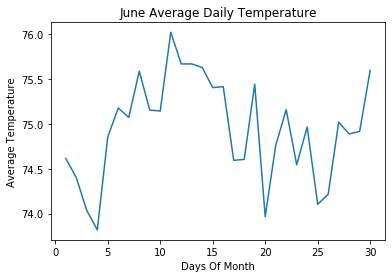

In [13]:
# Generate June average daily temperature all years
fig, ax = plt.subplots()
plt.xlabel("Days Of Month")
plt.ylabel("Average Temperature")
plt.title("June Average Daily Temperature")
ax.plot(june_all_years_tobs_daily_avg_df['day_of_month'], june_all_years_tobs_daily_avg_df['tobs'])
plt.savefig("june_avg_daily_temp_all_years.png")

In [14]:
# Get temperature measurement by station by date all years
june_all_years_tobs_per_stat_results = []
june_all_years_tobs_per_stat_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 6).all()
june_all_years_tobs_per_stat_df = pd.DataFrame(june_all_years_tobs_per_stat_results, columns=['station','date','tobs'])

In [15]:
# Get count temperature measurement by station by date all years
june_all_years_tobs_per_stat_day_count = june_all_years_tobs_per_stat_df.groupby(['date', 'station'])["tobs"].count()

In [16]:
# Identify stations with more then one measurement per day
june_all_years_tobs_per_stat_day_count.loc[(june_all_years_tobs_per_stat_day_count > 1)]

Series([], Name: tobs, dtype: int64)

In [17]:
# Perform a query to retrieve the december weather data for all years
december_all_years_tobs_results = []
december_all_years_tobs_results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 12).all()
december_all_years_tobs_df = pd.DataFrame(december_all_years_tobs_results, columns=['date','tobs'])

In [18]:
december_all_years_tobs_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


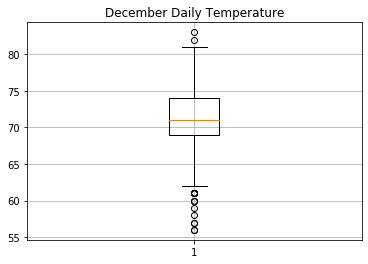

In [28]:
# Generate boxplot for December weather data all years
fig1, ax = plt.subplots()
ax.set_title('December Daily Temperature')
ax.boxplot(december_all_years_tobs_df["tobs"])
ax.grid()
plt.savefig("december_daily_temp_all_years_boxplot.png")

In [20]:
december_all_years_tobs_df["day_of_month"] = pd.to_datetime(december_all_years_tobs_df["date"]).dt.day

In [21]:
december_all_years_tobs_daily_avg_df = december_all_years_tobs_df[["day_of_month","tobs"]].groupby(["day_of_month"]).mean()
december_all_years_tobs_daily_avg_df.reset_index(inplace=True)

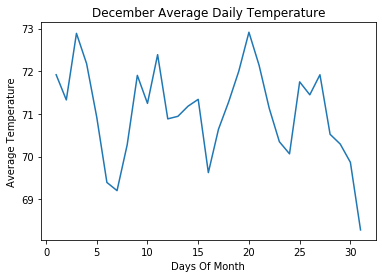

In [22]:
# Generate June average daily temperature all years
fig, ax = plt.subplots()
plt.xlabel("Days Of Month")
plt.ylabel("Average Temperature")
plt.title("December Average Daily Temperature")
ax.plot(december_all_years_tobs_daily_avg_df['day_of_month'], december_all_years_tobs_daily_avg_df['tobs'])
plt.savefig("december_avg_daily_temp_all_years.png")

In [23]:
# Get temperature measurement by station by date all years
dec_all_years_tobs_per_stat_results = []
dec_all_years_tobs_per_stat_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 12).all()
dec_all_years_tobs_per_stat_df = pd.DataFrame(dec_all_years_tobs_per_stat_results, columns=['station','date','tobs'])

In [24]:
# Get count temperature measurement by station by date all years
dec_all_years_tobs_per_stat_day_count = dec_all_years_tobs_per_stat_df.groupby(['date', 'station'])["tobs"].count()

In [25]:
# Identify stations with more then one measurement per day
dec_all_years_tobs_per_stat_day_count.loc[(dec_all_years_tobs_per_stat_day_count > 1)]

Series([], Name: tobs, dtype: int64)

In [27]:
# Get distinct count of weather stations
station_distinct_count_results = []
station_distinct_count_results = session.query(func.count(distinct(Measurement.station)))
station_distinct_count_results.all() 

[(9)]